In [1]:
import numpy as np
import matplotlib.pyplot as plt
import a6_utils
from pathlib import Path
import cv2

# Exercise 1

a)

In [2]:
def PCA(X):
    N = X.shape[1]
    # Calculate the mean value
    mi = 1/N * np.sum(X, axis=1, keepdims=True)
    
    # Center the data
    X_d =  X - mi
    
    # Covariance matrix
    C = 1/(N-1) * X_d @ X_d.T
    
    U, S, VT = np.linalg.svd(C)
    
    return U, S, VT, mi, C

Eigenvalues: [4.28761026 1.29572308]
Eigenvectors: [[-0.99369475 -0.11211934]
 [-0.11211934  0.99369475]]


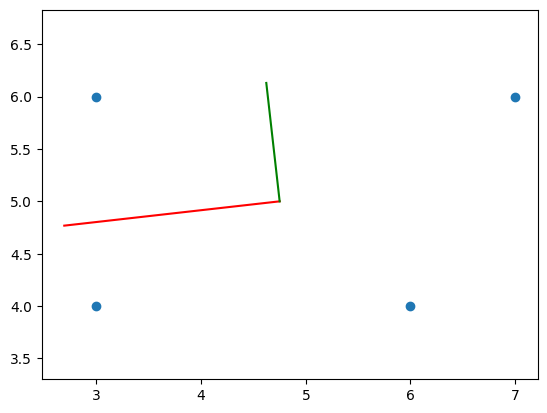

In [3]:
points = np.array([[3, 3, 7, 6], [4, 6, 6, 4]])

U, S, VT, mi, C = PCA(points)
S_root = S**(1/2)

plt.axis('equal')
plt.scatter(points[0], points[1])
plt.plot([mi[0,0], mi[0,0] + U[0,0]*S_root[0]],[mi[1,0], mi[1,0] + U[1,0]*S_root[0]], color="red")
plt.plot([mi[0,0], mi[0,0] + U[0,1]*S_root[1]],[mi[1,0], mi[1,0] + U[1,1]*S_root[1]], color="green")

print("Eigenvalues:", S)
print("Eigenvectors:", U)

b)

In [4]:
with open("data/points.txt") as f:
    points = np.array(f.read().split()).astype("float64").reshape((-1, 2)).T

print("Points:", points)

Points: [[1. 6. 5. 1. 0.]
 [0. 2. 4. 3. 1.]]


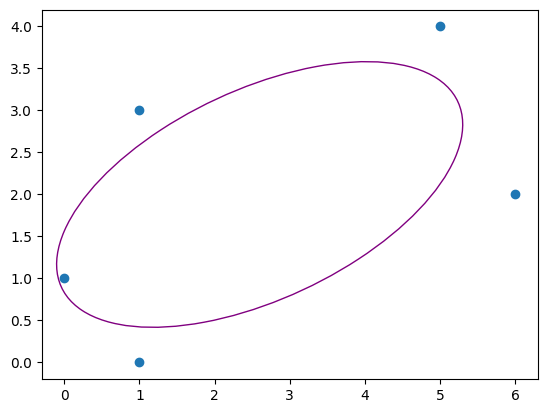

In [5]:
U, S, VT, mi, C = PCA(points)

S_root = S**(1/2)

a6_utils.drawEllipse(mi, C)
plt.scatter(points[0], points[1])

c)

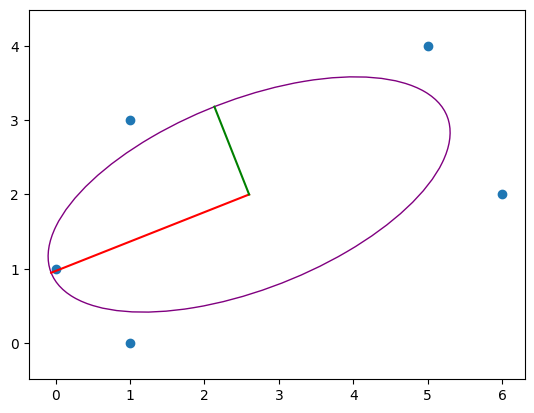

In [6]:
a6_utils.drawEllipse(mi, C)
plt.axis('equal')
plt.scatter(points[0], points[1])
plt.plot([mi[0,0], mi[0,0] + U[0,0]*S_root[0]],[mi[1,0], mi[1,0] + U[1,0]*S_root[0]], color="red")
plt.plot([mi[0,0], mi[0,0] + U[0,1]*S_root[1]],[mi[1,0], mi[1,0] + U[1,1]*S_root[1]], color="green")

Q: If we change data or add more data eigenvectors will change as well however they will always have length of 1 and be perpendicular to each other.

d)

<BarContainer object of 2 artists>

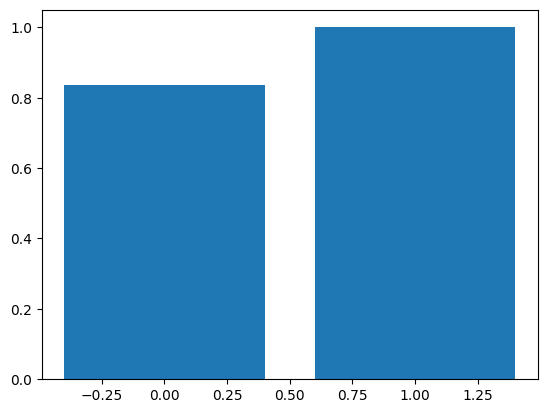

In [7]:
cumsum = np.cumsum(S)
cumsum_norm = cumsum / np.max(cumsum)

plt.bar(range(len(cumsum_norm)), cumsum_norm)

Q: Around 80% of variance is explained by the first eigenvector.

e)

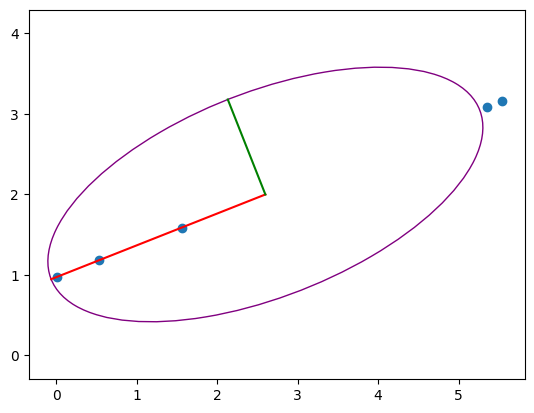

In [8]:
# Transform into corresponding PCA space using U
y = U.T @ (points - mi)
U_deminished = U.copy()
U_deminished[:, -1] = 0

transformed_points = U_deminished @ y + mi

plt.axis('equal')
a6_utils.drawEllipse(mi, C)
plt.scatter(transformed_points[0], transformed_points[1])
plt.plot([mi[0,0], mi[0,0] + U[0,0]*S_root[0]],[mi[1,0], mi[1,0] + U[1,0]*S_root[0]], color="red")
plt.plot([mi[0,0], mi[0,0] + U[0,1]*S_root[1]],[mi[1,0], mi[1,0] + U[1,1]*S_root[1]], color="green")

Q: Reconstructed points get orthogonally projected on the subspace (in that case line) defined by the first eigenvector.

f)

In [9]:
def closest_point(points, q):
    d = [np.sqrt((points[i,0] - q[0])**2 + (points[i,1] - q[1])**2) for i in range(len(points))] 
    closest = points[np.argmin(d)]        
    return closest

Closest: [5. 4.] [5.54021325 3.16269992]


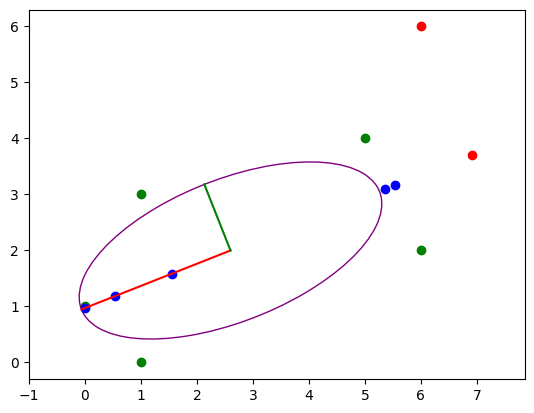

In [10]:
q = np.array([[6], [6]])

closest = closest_point(points.T, q)

y = U.T @ (points - mi)
y_q = U.T @ (q - mi)
U_deminished = U.copy()
U_deminished[:, -1] = 0

transformed_points = U_deminished @ y + mi
transformed_q = U_deminished @ y_q + mi

closest_t = closest_point(transformed_points.T, transformed_q.reshape(-1))

print("Closest:", closest, closest_t)

plt.axis('equal')
a6_utils.drawEllipse(mi, C)
plt.scatter(points[0], points[1], color="green")
plt.scatter(transformed_points[0], transformed_points[1], color="blue")
plt.scatter(q[0], q[1], color="red")
plt.scatter(transformed_q[0], transformed_q[1], color="red")
plt.plot([mi[0,0], mi[0,0] + U[0,0]*S_root[0]],[mi[1,0], mi[1,0] + U[1,0]*S_root[0]], color="red")
plt.plot([mi[0,0], mi[0,0] + U[0,1]*S_root[1]],[mi[1,0], mi[1,0] + U[1,1]*S_root[1]], color="green")

# Exercise 2

a)

In [11]:
def dual_PCA(X):
    N = X.shape[1]

    # Mean value
    mi = np.mean(X, axis=1, keepdims=True)
    
    # Center the data
    X_d =  X - mi
    
    # Dual covariance matrix
    C = 1/(N-1) * (X_d.T @ X_d)
    
    # SVD of dual covariance matrix
    U, S, VT = np.linalg.svd(C)

    # Add small constant to prevent division by zero
    S += 1e-15
    
    U = X_d @ U @ np.diag(np.sqrt(1/(S*(N-1))))

    return U, S, VT, mi, C

In [12]:
U, S, VT, mi, C = dual_PCA(points)

S_root = S**(1/2)

print(U)

[[ 9.29929353e-01 -3.67738219e-01  8.98340017e-09 -1.94671267e-09
   1.96446071e-09]
 [ 3.67738219e-01  9.29929353e-01 -5.40177726e-09  0.00000000e+00
  -1.74983738e-09]]


b)

In [13]:
# PCA space
y = U.T @ (points - mi)

# Original space
transformed_points = U @ y + mi

print(points)
print(transformed_points)

[[1. 6. 5. 1. 0.]
 [0. 2. 4. 3. 1.]]
[[1.00000000e+00 6.00000000e+00 5.00000000e+00 1.00000000e+00
  2.22044605e-15]
 [1.11022302e-15 2.00000000e+00 4.00000000e+00 3.00000000e+00
  1.00000000e+00]]


# Exercise 3

a)

In [14]:
def load_images(i):
    dir = Path(f"data/faces/{i}")
    images = []
    for img_path in dir.iterdir():
        img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2GRAY).astype('float64').flatten()
        images.append(img)
    return np.array(images)

In [15]:
dir1 = load_images(1)
dir2 = load_images(2)
dir3 = load_images(3)

b)

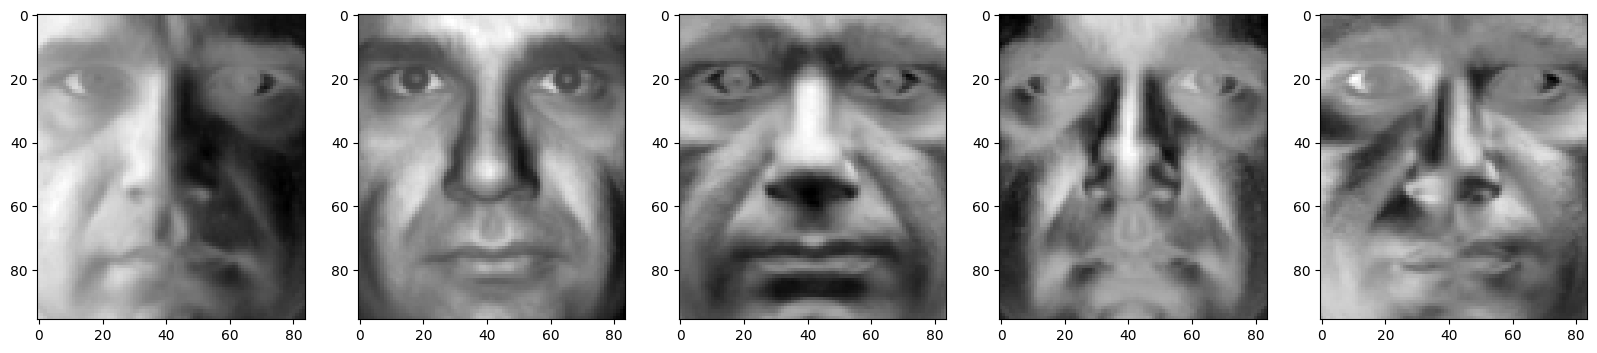

In [16]:
U, S, VT, mi, C = dual_PCA(dir1.T)

plt.figure(figsize=(20,10))
# First five eigenvectors
for i in range(5):
	plt.subplot(1,5,i+1)
	plt.imshow(U[:,i].reshape((96, 84)), cmap="gray")

A: The resulting eigen vecotrs numerically represent the orthogonal basis of subspace that captures variance in data the best. Each vector captures a specific patteren of the face.

U: (8064, 64)
First image: (8064,)
y: (64, 1)
First image transformed: (8064, 1)


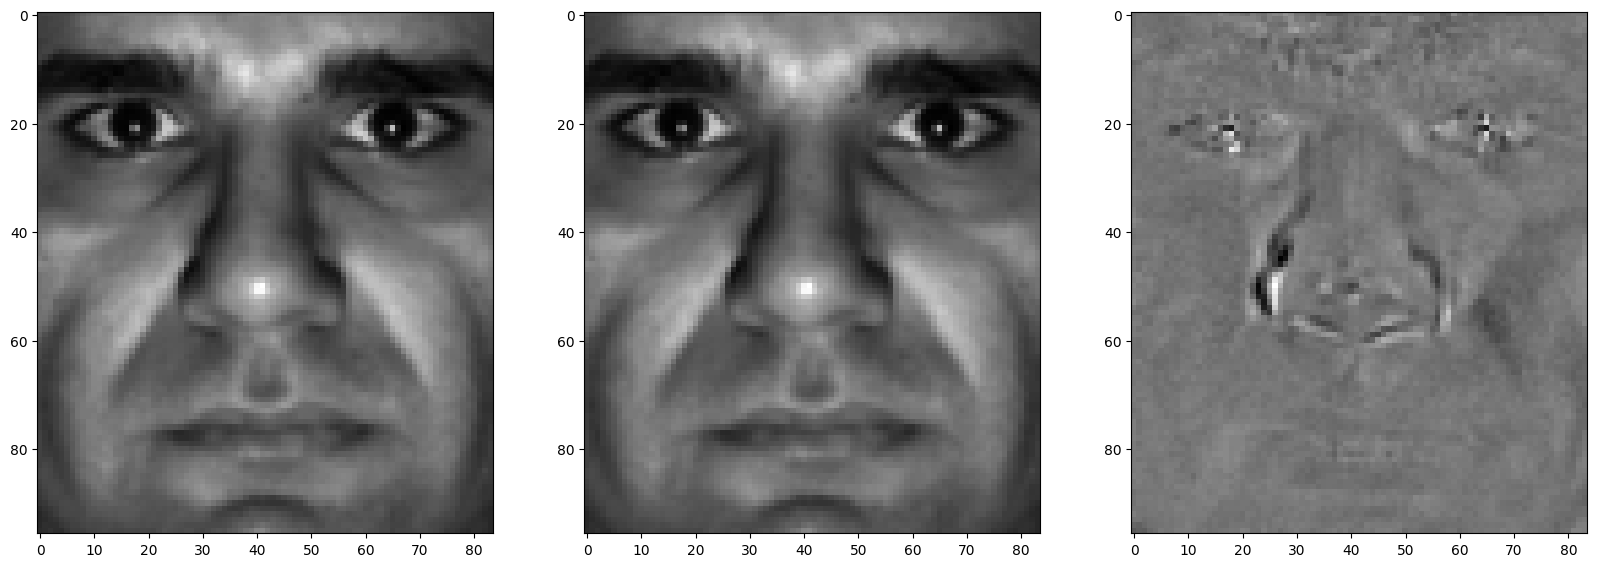

In [17]:
first_image = dir1[0]
y = U.T @ (first_image.reshape((-1, 1)) - mi)
first_image_transformed = U @ y + mi
difference = first_image - first_image_transformed.flatten()

print("U:", U.shape)
print("First image:", first_image.shape)
print("y:", y.shape)
print("First image transformed:", first_image_transformed.shape)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(first_image.reshape((96,84)), cmap="gray")
plt.subplot(1,3,2)
plt.imshow(first_image_transformed.reshape((96,84)), cmap="gray")
plt.subplot(1,3,3)
plt.imshow(difference.reshape((96,84)), cmap="gray")

Dif1: 9
Dif2: 2891


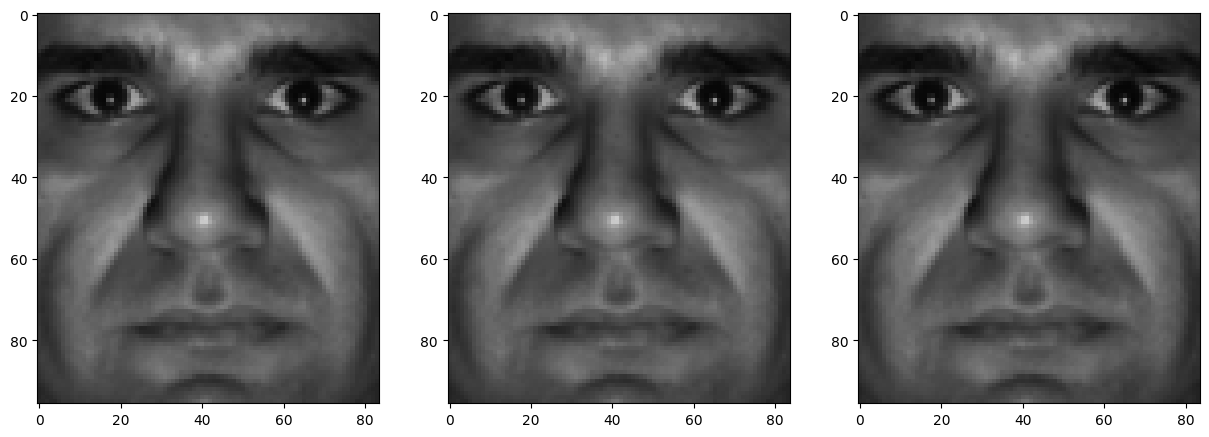

In [18]:
# Component in image space set to 0
first_image_1 = dir1[0].copy()
first_image_1[4074] = 0
y_1 = U.T @ (first_image_1.reshape((-1, 1)) - mi)
first_image_transformed_1 = U @ y_1 + mi
difference_1 = dir1[0] - first_image_transformed_1.flatten()
print("Dif1:", np.count_nonzero(difference_1 > 1))

# Component in PCA space set to 0
first_image_2 = dir1[0].copy()
y_2 = U.T @ (first_image.reshape((-1, 1)) - mi)
y_2[0] = 0
first_image_transformed_2 = U @ y_2 + mi
difference_2 = dir1[0] - first_image_transformed_2.flatten()
print("Dif2:", np.count_nonzero(difference_2 > 1))

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(dir1[0].reshape((96,84)), cmap="gray", vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(first_image_transformed_1.reshape((96,84)), cmap="gray", vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(first_image_transformed_2.reshape((96,84)), cmap="gray", vmin=0, vmax=255)

c)

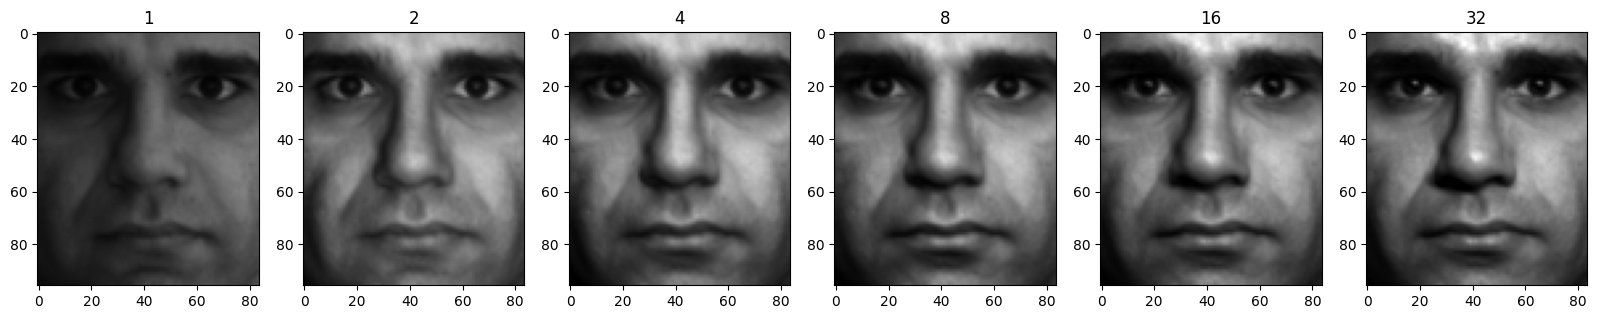

In [19]:
image = dir1[5]

y = U.T @ (image.reshape((-1, 1)) - mi)

plt.figure(figsize=(20,5))
for i in range(6):
    d = 2 ** i
    y_reduced = y.copy()
    y_reduced[d:] = 0
    image_transformed = U @ y_reduced + mi
    
    plt.subplot(1, 6, 1+i)
    plt.title(f"{d}")
    plt.imshow(image_transformed.reshape((96,84)), cmap="gray", vmax=255, vmin=0)

Q: the more components we preserve the better the image quality. However the images with more preserved componens also take up more space.

d)

In [20]:
%matplotlib qt

In [21]:
U, S, VT, mi, C = dual_PCA(dir2.T)
img_avg = dir2.mean(axis=0)
y = U.T @ (img_avg.reshape((-1, 1)) - mi)

x = 2700
frames = 20
sin_values = x * np.sin(np.linspace(0, 2*np.pi, frames))
cos_values = x * np.cos(np.linspace(0, 2*np.pi, frames))

fig, ax = plt.subplots()
for s, c in zip(sin_values, cos_values):
    y_modified = np.copy(y)
    y_modified[0] = s
    y_modified[1] = c
    img_reconstructed = U @ y_modified + mi
    
    ax.imshow(img_reconstructed.reshape((96,84)), cmap="gray", vmin=0, vmax=255)
    ax.set_title(f'S: {s: .2f}, C: {c: .2f}')
    ax.axis("off")
    
    plt.draw()
    plt.pause(0.05)

plt.show()

e)

In [22]:
%matplotlib inline

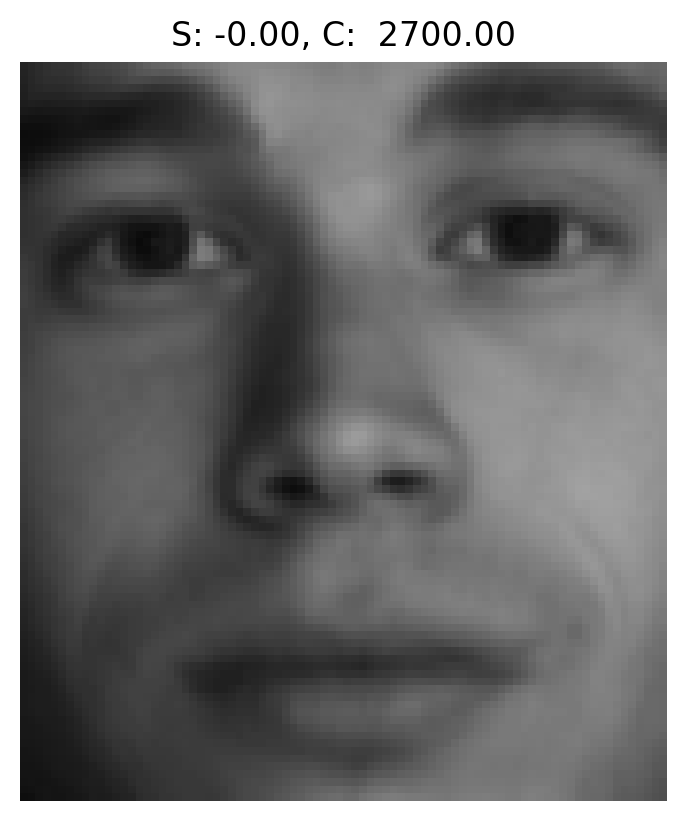

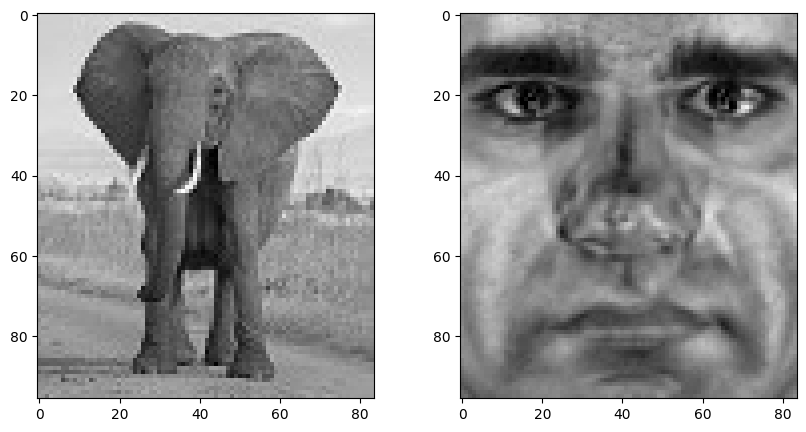

In [23]:
U, S, VT, mi, C = dual_PCA(dir1.T)

elephant = cv2.cvtColor(cv2.imread("data/elephant.jpg"), cv2.COLOR_BGR2GRAY).astype('float64').flatten()

y = U.T @ (elephant.reshape((-1, 1)) - mi)
elephant_transformed = U @ y + mi

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(elephant.reshape((96, 84)), cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(elephant_transformed.reshape((96, 84)), cmap="gray", vmin=0, vmax=255)